In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from keras.models import Sequential

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training =train_datagen.flow_from_directory(
    'dataset/training_set',
    seed=123,
    target_size=(200,105),
    batch_size=32,
    class_mode='binary')

validation =test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(200,105),
    batch_size=32,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200,105,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model_trained=model.fit(
        training,
        steps_per_epoch=2000 // 32,
        epochs=50,
        validation_data=validation,
        validation_steps=800 // 32)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 53s 849ms/step - loss: 0.7303 - accuracy: 0.5323 - val_loss: 0.6682 - val_accuracy: 0.6425
Epoch 2/50
62/62 [==============================] - 48s 768ms/step - loss: 0.6718 - accuracy: 0.6023 - val_loss: 0.6456 - val_accuracy: 0.6112
Epoch 3/50
62/62 [==============================] - 47s 763ms/step - loss: 0.6450 - accuracy: 0.6179 - val_loss: 0.5968 - val_accuracy: 0.6888
Epoch 4/50
62/62 [==============================] - 52s 838ms/step - loss: 0.6342 - accuracy: 0.6462 - val_loss: 0.5701 - val_accuracy: 0.6963
Epoch 5/50
62/62 [==============================] - 59s 949ms/step - loss: 0.6138 - accuracy: 0.6653 - val_loss: 0.5711 - val_accuracy: 0.6900
Epoch 6/50
62/62 [==============================] - 55s 895ms/step - loss: 0.5919 - accuracy: 0.6820 - val_loss: 0.5442 - val_accuracy: 0.6938
Epoch 7/50
62/62 [==============================] - 47s 76

In [4]:
import tensorflow as tf

tf.saved_model.save(model,"models/")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/assets


In [13]:
score = model.evaluate(validation, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 79.35%


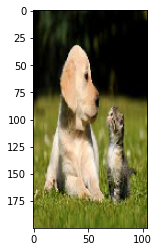

[[1.]]


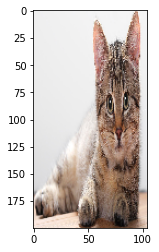

[[1.]]


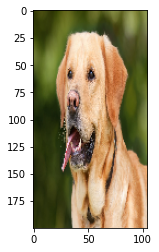

[[1.]]


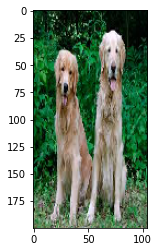

[[1.]]


In [12]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

dir_path = 'dataset/single_prediction'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200, 105, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    
    print(val)

In [14]:
from cv2 import cv2

for i in os.listdir(dir_path):
    img = cv2.imread(dir_path+'//'+i)

    img=cv2.resize(img,(200,105))
    img = img.reshape(-1,200, 105,3)

    classes = model.predict_classes(img)

    if classes == [[0]]:
        print("I thought I saw a pussycat!")
    else:
        print("Maximum Schulk!")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I thought I saw a pussycat!
I thought I saw a pussycat!
Maximum Schulk!
Maximum Schulk!


In [18]:
loaded_model = tf.keras.models.load_model('models/')

In [19]:
from cv2 import cv2

for i in os.listdir(dir_path):
    img = cv2.imread(dir_path+'//'+i)

    img = cv2.resize(img,(200,105))
    img = img.reshape(-1,200, 105,3)

    classes = loaded_model.predict_classes(img)

    if classes == [[0]]:
        print("I thought I saw a pussycat!")
    else:
        print("Maximum Schulk!")

I thought I saw a pussycat!
I thought I saw a pussycat!
Maximum Schulk!
Maximum Schulk!
